In [99]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#1 - Import Libraries


In [100]:
#Import thư viện
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LinearRegression

#2 - Load Data

In [101]:
# Đường dẫn tới thư mục chứa các file CSV trên Google Drive
folder_path = '/content/drive/MyDrive/DAMH/Data/RawData'

# Đường dẫn tới thư mục chứa các file CSV trên Google Drive
folder_path = '/content/drive/MyDrive/DAMH/Data/RawData'

# Danh sách các file CSV trong thư mục
csv_files = [file for file in os.listdir(folder_path) if file.endswith('.csv')]

# Gộp các DataFrame vào một DataFrame duy nhất
merged_df = pd.DataFrame()

# Đọc các file CSV và gộp vào DataFrame
for csv_file in csv_files:
    file_path = os.path.join(folder_path, csv_file)
    df_name = os.path.splitext(csv_file)[0]
    df = pd.read_csv(file_path, encoding='latin1')
    df['SourceFile'] = csv_file
    merged_df = pd.concat([merged_df, df], ignore_index=True)

merged_df = merged_df.rename(columns = {'Date':'DateTime','Weather Description':'WeatherDescription'})
# In thông tin của DataFrame gộp
print('Thông tin của DataFrame gộp:')
print(merged_df.info())

# In các dòng của DataFrame gộp
print('Kiểm tra dữ liệu trong DataFrame gộp:')
merged_df

Thông tin của DataFrame gộp:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18607 entries, 0 to 18606
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   DateTime            18607 non-null  object
 1   Temperature         18607 non-null  object
 2   WeatherDescription  18607 non-null  object
 3   Humidity            18607 non-null  object
 4   Barometer           18607 non-null  object
 5   WindDirection       18607 non-null  object
 6   WindSpeed           18607 non-null  object
 7   SourceFile          18607 non-null  object
dtypes: object(8)
memory usage: 1.1+ MB
None
Kiểm tra dữ liệu trong DataFrame gộp:


,DateTime,Temperature,WeatherDescription,Humidity,Barometer,WindDirection,WindSpeed,SourceFile
0,"Friday, 1 January 2021, 00:00  06:00",24 / 23 °C,Passing clouds.,Humidity: 64%,Barometer: 1011 mbar,NNE,Wind: 10 km/h,weather_data_2021-1.csv
1,"Friday, 1 January 2021, 06:00  12:00",28 / 23 °C,Partly sunny.,Humidity: 59%,Barometer: 1013 mbar,NNE,Wind: 10 km/h,weather_data_2021-1.csv
2,"Friday, 1 January 2021, 12:00  18:00",30 / 27 °C,Partly sunny.,Humidity: 48%,Barometer: 1010 mbar,NE,Wind: 14 km/h,weather_data_2021-1.csv
3,"Friday, 1 January 2021, 18:00  00:00",27 / 23 °C,Passing clouds.,Humidity: 57%,Barometer: 1012 mbar,N,Wind: 12 km/h,weather_data_2021-1.csv
4,"Saturday, 2 January 2021, 00:00  06:00",23 / 22 °C,Passing clouds.,Humidity: 68%,Barometer: 1011 mbar,N,Wind: 9 km/h,weather_data_2021-1.csv
...,...,...,...,...,...,...,...,...
18602,"Wednesday, 29 April 2020, 18:00  00:00",32 / 29 °C,Partly cloudy.,Humidity: 55%,Barometer: 1009 mbar,SE,Wind: 13 km/h,weather_data_2020-4.csv
18603,"Thursday, 30 April 2020, 00:00  06:00",28 / 26 °C,Passing clouds.,Humidity: 80%,Barometer: 1010 mbar,E,Wind: 6 km/h,weather_data_2020-4.csv
18604,"Thursday, 30 April 2020, 06:00  12:00",36 / 27 °C,Scattered clouds.,Humidity: 54%,Barometer: 1011 mbar,N,Wind: 5 km/h,weather_data_2020-4.csv
18605,"Thursday, 30 April 2020, 12:00  18:00",37 / 32 °C,Scattered clouds.,Humidity: 43%,Barometer: 1008 mbar,S,Wind: 10 km/h,weather_data_2020-4.csv


#3 - Data Preparation

In [102]:
merged_df.isnull().sum()

DateTime              0
Temperature           0
WeatherDescription    0
Humidity              0
Barometer             0
WindDirection         0
WindSpeed             0
SourceFile            0
dtype: int64

###Date


In [103]:
merged_df = merged_df.drop_duplicates(subset=['DateTime'])
merged_df[["DayOfWeek", "Date", "Time"]] = merged_df["DateTime"].str.split(", ", expand=True)
merged_df[["StartTime", "EndTime"]] = merged_df["Time"].str.split("  ", expand=True)

def time_to_period(start_time):
    start_hour = int(start_time.split(":")[0])

    if start_hour >= 0 and start_hour < 6:
        return "Night"
    elif start_hour >= 6 and start_hour < 12:
        return "Morning"
    elif start_hour >= 12 and start_hour < 18:
        return "Afternoon"
    else:
        return "Evening"

merged_df["Time"] = merged_df["StartTime"].apply(time_to_period)

merged_df["Date"] = pd.to_datetime(merged_df["Date"], format='%d %B %Y').dt.strftime('%Y-%m-%d')

merged_df = merged_df.drop(["StartTime", "EndTime"], axis=1)
merged_df = merged_df.drop('DateTime', axis = 1)
merged_df = merged_df.drop('SourceFile', axis = 1)

merged_df['Date'] = pd.to_datetime(merged_df['Date'])

merged_df


<ipython-input-103-78c83a5845c1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df[["DayOfWeek", "Date", "Time"]] = merged_df["DateTime"].str.split(", ", expand=True)
<ipython-input-103-78c83a5845c1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df[["DayOfWeek", "Date", "Time"]] = merged_df["DateTime"].str.split(", ", expand=True)
<ipython-input-103-78c83a5845c1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_i

,Temperature,WeatherDescription,Humidity,Barometer,WindDirection,WindSpeed,DayOfWeek,Date,Time
0,24 / 23 °C,Passing clouds.,Humidity: 64%,Barometer: 1011 mbar,NNE,Wind: 10 km/h,Friday,2021-01-01,Night
1,28 / 23 °C,Partly sunny.,Humidity: 59%,Barometer: 1013 mbar,NNE,Wind: 10 km/h,Friday,2021-01-01,Morning
2,30 / 27 °C,Partly sunny.,Humidity: 48%,Barometer: 1010 mbar,NE,Wind: 14 km/h,Friday,2021-01-01,Afternoon
3,27 / 23 °C,Passing clouds.,Humidity: 57%,Barometer: 1012 mbar,N,Wind: 12 km/h,Friday,2021-01-01,Evening
4,23 / 22 °C,Passing clouds.,Humidity: 68%,Barometer: 1011 mbar,N,Wind: 9 km/h,Saturday,2021-01-02,Night
...,...,...,...,...,...,...,...,...,...
18602,32 / 29 °C,Partly cloudy.,Humidity: 55%,Barometer: 1009 mbar,SE,Wind: 13 km/h,Wednesday,2020-04-29,Evening
18603,28 / 26 °C,Passing clouds.,Humidity: 80%,Barometer: 1010 mbar,E,Wind: 6 km/h,Thursday,2020-04-30,Night
18604,36 / 27 °C,Scattered clouds.,Humidity: 54%,Barometer: 1011 mbar,N,Wind: 5 km/h,Thursday,2020-04-30,Morning
18605,37 / 32 °C,Scattered clouds.,Humidity: 43%,Barometer: 1008 mbar,S,Wind: 10 km/h,Thursday,2020-04-30,Afternoon


###Temperature

In [104]:
merged_df[['HighTemp', 'LowTemp']] = merged_df['Temperature'].str.split(' / ', expand=True)

merged_df = merged_df.dropna(subset=['LowTemp','HighTemp'])

merged_df['LowTemp'] = merged_df['LowTemp'].str.replace(' °C', '')
merged_df['LowTemp'] = merged_df['LowTemp'].str.replace(' ï¿½C', '')

merged_df = merged_df.drop('Temperature', axis=1)

# Sắp xếp lại DataFrame theo cột 'date'
merged_df = merged_df.sort_values(by=['Date'])


# In kết quả
merged_df

<ipython-input-104-fa175cfd9648>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df['LowTemp'] = merged_df['LowTemp'].str.replace(' °C', '')
<ipython-input-104-fa175cfd9648>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df['LowTemp'] = merged_df['LowTemp'].str.replace(' ï¿½C', '')


,WeatherDescription,Humidity,Barometer,WindDirection,WindSpeed,DayOfWeek,Date,Time,HighTemp,LowTemp
4014,Scattered clouds.,Humidity: 68%,Barometer: 1007 mbar,N,Wind: 8 km/h,Saturday,2011-01-01,Afternoon,31,27
4013,Scattered clouds.,Humidity: 82%,Barometer: 1009 mbar,N,Wind: 4 km/h,Saturday,2011-01-01,Morning,29,23
4015,Passing clouds.,Humidity: 86%,Barometer: 1008 mbar,SSE,Wind: 7 km/h,Saturday,2011-01-01,Evening,27,23
4012,Fog.,Humidity: 99%,Barometer: 1007 mbar,W,Wind: 3 km/h,Saturday,2011-01-01,Night,23,22
4019,Passing clouds.,Humidity: 84%,Barometer: 1009 mbar,N,Wind: 6 km/h,Sunday,2011-01-02,Evening,28,23
...,...,...,...,...,...,...,...,...,...,...
4007,Passing clouds.,Humidity: 89%,Barometer: 1012 mbar,N,Wind: 10 km/h,Friday,2023-09-29,Evening,31,27
4008,Light rain. Partly cloudy.,Humidity: 98%,Barometer: 1011 mbar,WSW,Wind: 9 km/h,Saturday,2023-09-30,Night,26,24
4009,Broken clouds.,Humidity: 95%,Barometer: 1013 mbar,NNW,Wind: 15 km/h,Saturday,2023-09-30,Morning,30,24
4010,Scattered clouds.,Humidity: 84%,Barometer: 1009 mbar,WNW,Wind: 15 km/h,Saturday,2023-09-30,Afternoon,30,28


###WeatherDescription

In [105]:
merged_df['WeatherDescription'] = merged_df['WeatherDescription'].apply(lambda x: x.rstrip('.') if isinstance(x, str) else x)
merged_df['WeatherDescription'] = merged_df['WeatherDescription'].str.replace('.', ',')

merged_df['WeatherDescription']

<ipython-input-105-26d82e634d63>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  merged_df['WeatherDescription'] = merged_df['WeatherDescription'].str.replace('.', ',')


4014             Scattered clouds
4013             Scattered clouds
4015               Passing clouds
4012                          Fog
4019               Passing clouds
                  ...            
4007               Passing clouds
4008    Light rain, Partly cloudy
4009                Broken clouds
4010             Scattered clouds
4011               Passing clouds
Name: WeatherDescription, Length: 18565, dtype: object

###Humidity

In [106]:
merged_df['Humidity'] = merged_df['Humidity'].str.replace('Humidity: ', '')
merged_df['Humidity'] = merged_df['Humidity'].str.replace('%', '')
merged_df['Humidity']

4014    68
4013    82
4015    86
4012    99
4019    84
        ..
4007    89
4008    98
4009    95
4010    84
4011    95
Name: Humidity, Length: 18565, dtype: object

###Barometer

In [107]:
merged_df['Barometer'] = merged_df['Barometer'].str.replace('Barometer: ', '')
merged_df['Barometer'] = merged_df['Barometer'].str.replace('mbar', '')
merged_df['Barometer']

4014    1007 
4013    1009 
4015    1008 
4012    1007 
4019    1009 
        ...  
4007    1012 
4008    1011 
4009    1013 
4010    1009 
4011    1010 
Name: Barometer, Length: 18565, dtype: object

### Wind

In [108]:
# Hàm chuyển đổi hướng gió thành độ
def wind_direction_to_degrees(direction):
    direction = direction.strip().lower()
    direction_degrees = {
        'n': 0,
        'nne': 22.5,
        'ne': 45,
        'ene': 67.5,
        'e': 90,
        'ese': 112.5,
        'se': 135,
        'sse': 157.5,
        's': 180,
        'ssw': 202.5,
        'sw': 225,
        'wsw': 247.5,
        'w': 270,
        'wnw': 292.5,
        'nw': 315,
        'nnw': 337.5
    }

    # Xác định góc tương ứng với hướng gió
    if direction in direction_degrees:
        return direction_degrees[direction]
    else:
        return None

merged_df['WindDegrees'] = merged_df['WindDirection'].apply(wind_direction_to_degrees)
merged_df['WindDegrees']

4014      0.0
4013      0.0
4015    157.5
4012    270.0
4019      0.0
        ...  
4007      0.0
4008    247.5
4009    337.5
4010    292.5
4011      0.0
Name: WindDegrees, Length: 18565, dtype: float64

In [109]:
merged_df['WindSpeed'] = merged_df['WindSpeed'].str.extract('(\d+)').astype("float")
merged_df['WindSpeed'] = merged_df['WindSpeed'] * 0.277778
merged_df['WindSpeed']


4014    2.222224
4013    1.111112
4015    1.944446
4012    0.833334
4019    1.666668
          ...   
4007    2.777780
4008    2.500002
4009    4.166670
4010    4.166670
4011    1.944446
Name: WindSpeed, Length: 18565, dtype: float64

###Change Datatype

In [110]:
merged_df = merged_df[['Date', 'Time', 'DayOfWeek', 'LowTemp', 'HighTemp', 'Humidity', 'Barometer', 'WindDegrees', 'WeatherDescription', 'WindSpeed']]

In [111]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18565 entries, 4014 to 4011
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                18565 non-null  datetime64[ns]
 1   Time                18565 non-null  object        
 2   DayOfWeek           18565 non-null  object        
 3   LowTemp             18565 non-null  object        
 4   HighTemp            18565 non-null  object        
 5   Humidity            18565 non-null  object        
 6   Barometer           18565 non-null  object        
 7   WindDegrees         18565 non-null  float64       
 8   WeatherDescription  18565 non-null  object        
 9   WindSpeed           18565 non-null  float64       
dtypes: datetime64[ns](1), float64(2), object(7)
memory usage: 1.6+ MB


In [112]:
merged_df['Date'] = pd.to_datetime(merged_df['Date'])
merged_df['Time'] = merged_df['Time'].astype("string")
merged_df['DayOfWeek'] = merged_df['DayOfWeek'].astype("string")
merged_df['LowTemp'] = merged_df['LowTemp'].astype("float")
merged_df['HighTemp'] = merged_df['HighTemp'].astype("float")
merged_df['Humidity'] = merged_df['Humidity'].astype("float")
merged_df['Barometer'] = merged_df['Barometer'].astype("float")
merged_df['WindDegrees'] = merged_df['WindDegrees'].astype("float")
merged_df['WeatherDescription'] = merged_df['WeatherDescription'].astype("string")

<ipython-input-112-636eba572b7b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df['Date'] = pd.to_datetime(merged_df['Date'])
<ipython-input-112-636eba572b7b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df['Time'] = merged_df['Time'].astype("string")
<ipython-input-112-636eba572b7b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.p

In [113]:
merged_df

,Date,Time,DayOfWeek,LowTemp,HighTemp,Humidity,Barometer,WindDegrees,WeatherDescription,WindSpeed
4014,2011-01-01,Afternoon,Saturday,27.0,31.0,68.0,1007.0,0.0,Scattered clouds,2.222224
4013,2011-01-01,Morning,Saturday,23.0,29.0,82.0,1009.0,0.0,Scattered clouds,1.111112
4015,2011-01-01,Evening,Saturday,23.0,27.0,86.0,1008.0,157.5,Passing clouds,1.944446
4012,2011-01-01,Night,Saturday,22.0,23.0,99.0,1007.0,270.0,Fog,0.833334
4019,2011-01-02,Evening,Sunday,23.0,28.0,84.0,1009.0,0.0,Passing clouds,1.666668
...,...,...,...,...,...,...,...,...,...,...
4007,2023-09-29,Evening,Friday,27.0,31.0,89.0,1012.0,0.0,Passing clouds,2.777780
4008,2023-09-30,Night,Saturday,24.0,26.0,98.0,1011.0,247.5,"Light rain, Partly cloudy",2.500002
4009,2023-09-30,Morning,Saturday,24.0,30.0,95.0,1013.0,337.5,Broken clouds,4.166670
4010,2023-09-30,Afternoon,Saturday,28.0,30.0,84.0,1009.0,292.5,Scattered clouds,4.166670


###Save File

In [114]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18565 entries, 4014 to 4011
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                18565 non-null  datetime64[ns]
 1   Time                18565 non-null  string        
 2   DayOfWeek           18565 non-null  string        
 3   LowTemp             18565 non-null  float64       
 4   HighTemp            18565 non-null  float64       
 5   Humidity            18565 non-null  float64       
 6   Barometer           18565 non-null  float64       
 7   WindDegrees         18565 non-null  float64       
 8   WeatherDescription  18565 non-null  string        
 9   WindSpeed           18565 non-null  float64       
dtypes: datetime64[ns](1), float64(6), string(3)
memory usage: 1.6 MB


In [115]:
merged_df.to_csv("/content/drive/MyDrive/DAMH/Data/PreparedData/prepared_data_weather.csv")

##Digitize (Rời rạc hoá)


###Temperature

In [116]:

# Tính trung bình cộng của "LowTemp" và "HighTemp"
merged_df['AverageTemp'] = (merged_df['LowTemp'] + merged_df['HighTemp']) / 2

# Mã hoá nhiệt độ dựa trên khoảng nhiệt độ
def encode_temperature(temp):
    if temp < 20:
        return 1  # Lạnh
    elif 20 <= temp < 25:
        return 2  # Mát mẻ
    elif 25 <= temp < 30:
        return 3  # Ấm áp
    else:
        return 4  # Nóng

merged_df['TemperatureEncoded'] = merged_df['AverageTemp'].apply(encode_temperature)

# Đưa Nhiệt độ được mã hoá thành cột mới
merged_df['TemperatureCategory'] = merged_df['TemperatureEncoded'].map({
    1: 'Lạnh',
    2: 'Mát mẻ',
    3: 'Ấm áp',
    4: 'Nóng'
})


###Humidity

In [117]:
# Tạo cột mới để mã hoá độ ẩm
humidity_conditions = [
    (merged_df['Humidity'] <= 60),
    (merged_df['Humidity'] > 60) & (merged_df['Humidity'] < 80),
    (merged_df['Humidity'] >= 80)
]

humidity_choices = ['Rất khô', 'Khô ráo', 'Ẩm ướt']
merged_df['HumidityLevel'] = np.select(humidity_conditions, humidity_choices, default='Khác')

# Mã hoá Độ ẩm thành giá trị số
humidity_mapping = {'Rất khô': 1, 'Khô ráo': 2, 'Ẩm ướt': 3}
merged_df['HumidityEncoded'] = merged_df['HumidityLevel'].map(humidity_mapping)

###Barometer

In [118]:
# Tạo cột mới để mã hoá áp suất
barometer_conditions = [
    (merged_df['Barometer'] > 1022.689),
    (merged_df['Barometer'] <= 1022.689) & (merged_df['Barometer'] > 1009.144),
    (merged_df['Barometer'] <= 1009.144)
]

barometer_choices = ['Áp suất cao', 'Áp suất bình thường', 'Áp suất thấp']
merged_df['BarometerLevel'] = np.select(barometer_conditions, barometer_choices, default='Khác')

# Mã hoá Áp suất thành giá trị số
barometer_mapping = {'Áp suất cao': 1, 'Áp suất bình thường': 2, 'Áp suất thấp': 3}
merged_df['BarometerEncoded'] = merged_df['BarometerLevel'].map(barometer_mapping)

In [119]:
merged_df

,Date,Time,DayOfWeek,LowTemp,HighTemp,Humidity,Barometer,WindDegrees,WeatherDescription,WindSpeed,AverageTemp,TemperatureEncoded,TemperatureCategory,HumidityLevel,HumidityEncoded,BarometerLevel,BarometerEncoded
4014,2011-01-01,Afternoon,Saturday,27.0,31.0,68.0,1007.0,0.0,Scattered clouds,2.222224,29.0,3,Ấm áp,Khô ráo,2,Áp suất thấp,3
4013,2011-01-01,Morning,Saturday,23.0,29.0,82.0,1009.0,0.0,Scattered clouds,1.111112,26.0,3,Ấm áp,Ẩm ướt,3,Áp suất thấp,3
4015,2011-01-01,Evening,Saturday,23.0,27.0,86.0,1008.0,157.5,Passing clouds,1.944446,25.0,3,Ấm áp,Ẩm ướt,3,Áp suất thấp,3
4012,2011-01-01,Night,Saturday,22.0,23.0,99.0,1007.0,270.0,Fog,0.833334,22.5,2,Mát mẻ,Ẩm ướt,3,Áp suất thấp,3
4019,2011-01-02,Evening,Sunday,23.0,28.0,84.0,1009.0,0.0,Passing clouds,1.666668,25.5,3,Ấm áp,Ẩm ướt,3,Áp suất thấp,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4007,2023-09-29,Evening,Friday,27.0,31.0,89.0,1012.0,0.0,Passing clouds,2.777780,29.0,3,Ấm áp,Ẩm ướt,3,Áp suất bình thường,2
4008,2023-09-30,Night,Saturday,24.0,26.0,98.0,1011.0,247.5,"Light rain, Partly cloudy",2.500002,25.0,3,Ấm áp,Ẩm ướt,3,Áp suất bình thường,2
4009,2023-09-30,Morning,Saturday,24.0,30.0,95.0,1013.0,337.5,Broken clouds,4.166670,27.0,3,Ấm áp,Ẩm ướt,3,Áp suất bình thường,2
4010,2023-09-30,Afternoon,Saturday,28.0,30.0,84.0,1009.0,292.5,Scattered clouds,4.166670,29.0,3,Ấm áp,Ẩm ướt,3,Áp suất thấp,3


#4 - EDA

In [120]:
EDA_df = merged_df.copy()

###Phân tích sự phân phối lớp của các nhãn trong WeatherDescription

In [121]:
EDA_df.WeatherDescription.value_counts()

Passing clouds                         9143
Scattered clouds                       4632
Partly sunny                           1894
Partly cloudy                           878
Broken clouds                           701
Fog                                     316
Light rain, Partly cloudy               259
Light rain, Broken clouds               111
Clear                                    80
Thunderstorms, Broken clouds             61
Thunderstorms, Partly cloudy             53
Sunny                                    52
Light rain, Passing clouds               50
Mostly cloudy                            49
More clouds than sun                     46
Light rain, Mostly cloudy                36
Thunderstorms, Scattered clouds          35
Light rain, More clouds than sun         24
Thunderstorms, Passing clouds            16
Light rain, Partly sunny                 16
Sprinkles, Broken clouds                 15
Overcast                                 14
Light rain, Overcast            

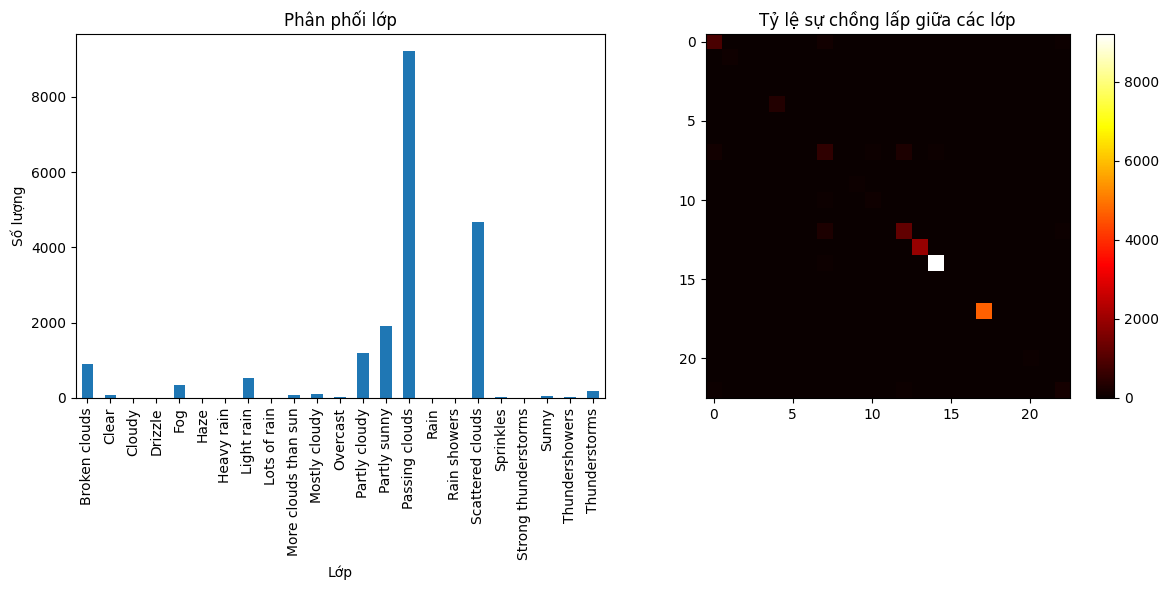

In [122]:
dummies_df = EDA_df['WeatherDescription'].str.get_dummies(', ')
# EDA_df = pd.concat([EDA_df, dummies_df], axis=1)
label_counts = dummies_df.sum()
# Tạo biểu đồ 1: Phân phối lớp
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)

label_counts.plot(kind='bar')
plt.xlabel('Lớp')
plt.ylabel('Số lượng')
plt.title('Phân phối lớp')

# Tạo biểu đồ 2: Tỷ lệ sự chồng lấp giữa các lớp
plt.subplot(1, 2, 2)

overlap = dummies_df.T.dot(dummies_df)
plt.imshow(overlap, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.title('Tỷ lệ sự chồng lấp giữa các lớp')

plt.tight_layout()
plt.show()

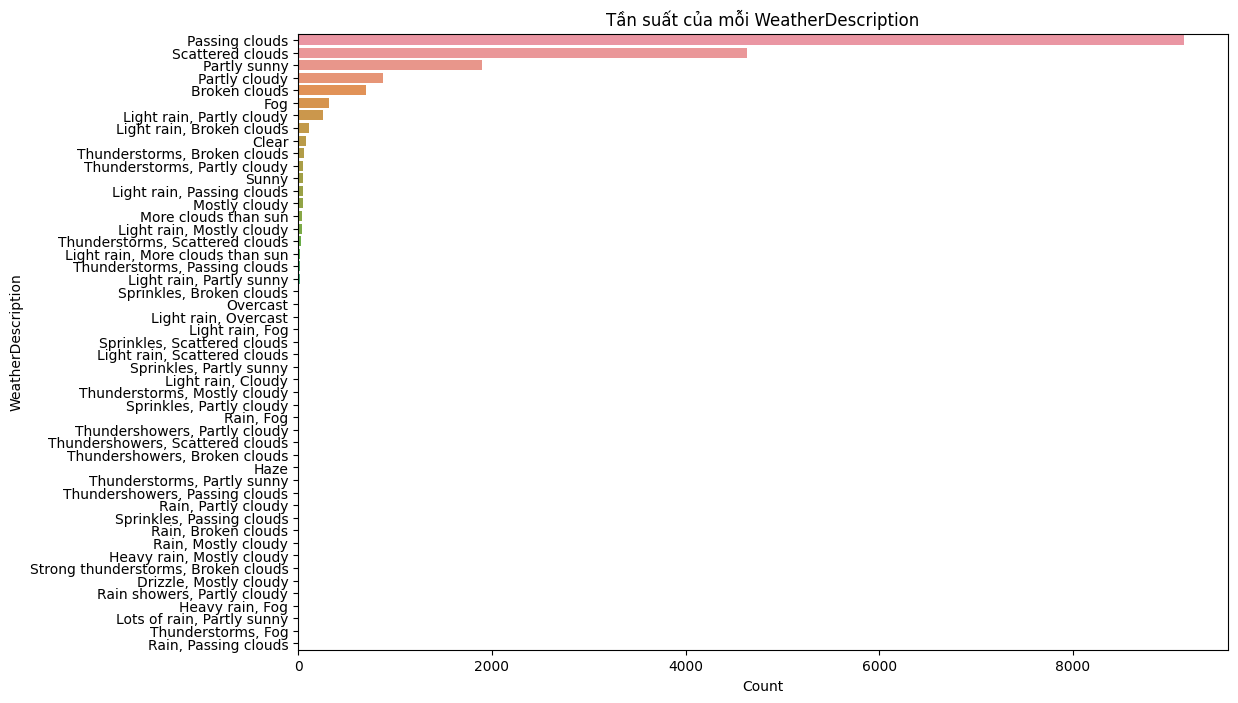

In [123]:
plt.figure(figsize=(12, 8))
sns.countplot(y='WeatherDescription', data=EDA_df, order = EDA_df['WeatherDescription'].value_counts().index)
plt.xlabel('Count')
plt.ylabel('WeatherDescription')
plt.title('Tần suất của mỗi WeatherDescription')
plt.show()

###Trực quan hoá tương quan giữa các thuộc tính với target "WeatherDescription"

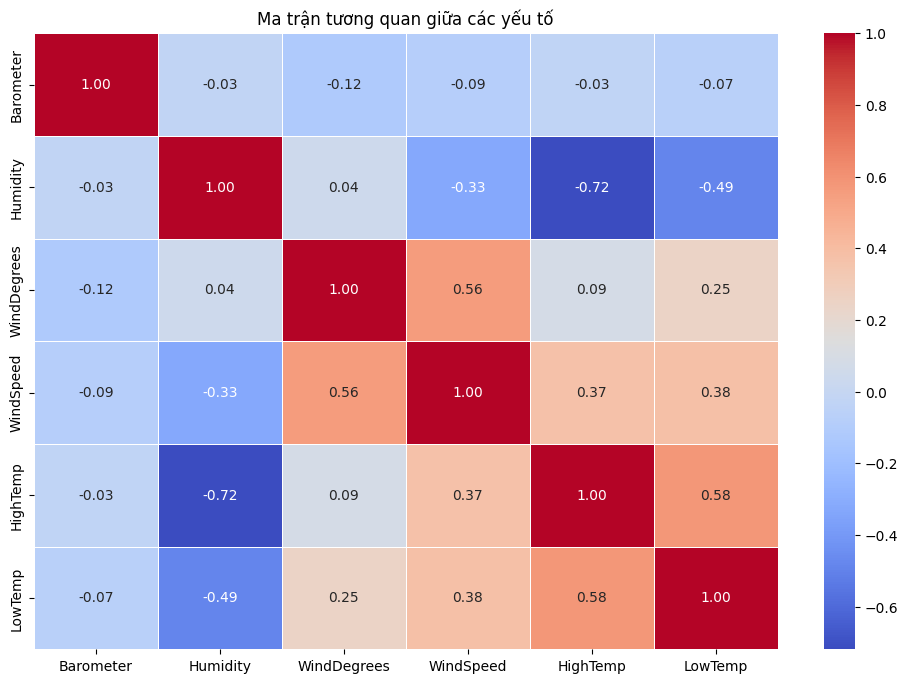

In [124]:
# Chọn các cột quan tâm từ DataFrame
features = ['Barometer', 'Humidity', 'WindDegrees', 'WindSpeed', 'HighTemp', 'LowTemp']
correlation_matrix = EDA_df[features].corr()

# Trực quan hóa ma trận tương quan bằng heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Ma trận tương quan giữa các yếu tố')
plt.show()

###Trực quan hóa ma trận tương quan bằng biểu đồ scatter plot của target "WindDegrees"

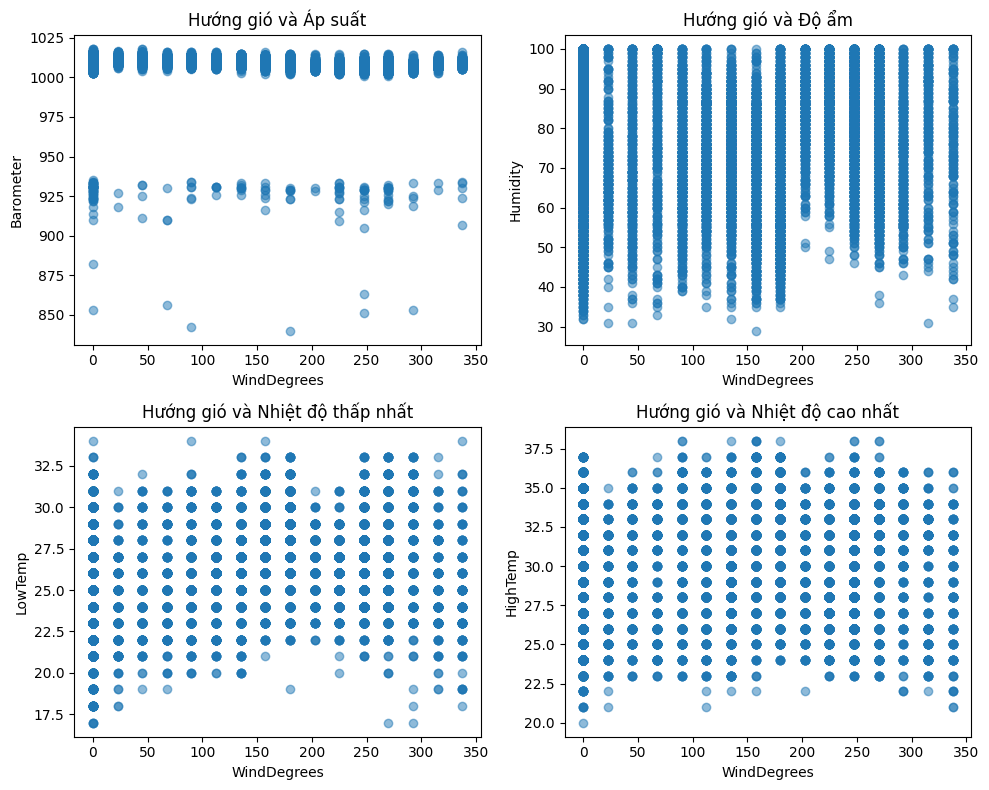

In [125]:
# Tạo lưới 2x2 cho biểu đồ
plt.figure(figsize=(10, 8))

# Biểu đồ 1
plt.subplot(2, 2, 1)
plt.scatter(EDA_df['WindDegrees'], EDA_df['Barometer'], alpha=0.5)
plt.xlabel('WindDegrees')
plt.ylabel('Barometer')
plt.title('Hướng gió và Áp suất')

# Biểu đồ 2
plt.subplot(2, 2, 2)
plt.scatter(EDA_df['WindDegrees'], EDA_df['Humidity'], alpha=0.5)
plt.xlabel('WindDegrees')
plt.ylabel('Humidity')
plt.title('Hướng gió và Độ ẩm')

# Biểu đồ 3
plt.subplot(2, 2, 3)
plt.scatter(EDA_df['WindDegrees'], EDA_df['LowTemp'], alpha=0.5)
plt.xlabel('WindDegrees')
plt.ylabel('LowTemp')
plt.title('Hướng gió và Nhiệt độ thấp nhất')

# Biểu đồ 4
plt.subplot(2, 2, 4)
plt.scatter(EDA_df['WindDegrees'], EDA_df['HighTemp'], alpha=0.5)
plt.xlabel('WindDegrees')
plt.ylabel('HighTemp')
plt.title('Hướng gió và Nhiệt độ cao nhất')

# Hiển thị biểu đồ lưới 2x2
plt.tight_layout()
plt.show()

###Trực quan hóa ma trận tương quan bằng biểu đồ scatter plot của target "Barometer"

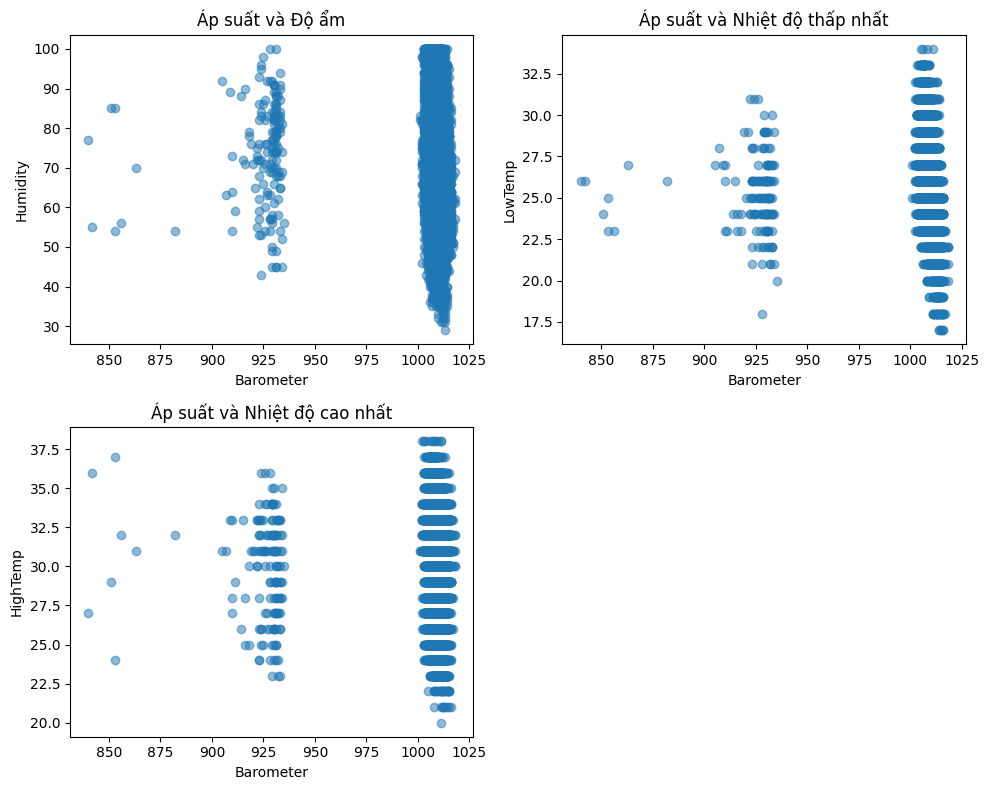

In [126]:
# Tạo lưới 2x2 cho biểu đồ Áp suất và các thuộc tính khác
plt.figure(figsize=(10, 8))

# Biểu đồ 1: Áp suất và Độ ẩm
plt.subplot(2, 2, 1)
plt.scatter(EDA_df['Barometer'], EDA_df['Humidity'], alpha=0.5)
plt.xlabel('Barometer')
plt.ylabel('Humidity')
plt.title('Áp suất và Độ ẩm')

# Biểu đồ 2: Áp suất và Nhiệt độ thấp nhất
plt.subplot(2, 2, 2)
plt.scatter(EDA_df['Barometer'], EDA_df['LowTemp'], alpha=0.5)
plt.xlabel('Barometer')
plt.ylabel('LowTemp')
plt.title('Áp suất và Nhiệt độ thấp nhất')

# Biểu đồ 3: Áp suất và Nhiệt độ cao nhất
plt.subplot(2, 2, 3)
plt.scatter(EDA_df['Barometer'], EDA_df['HighTemp'], alpha=0.5)
plt.xlabel('Barometer')
plt.ylabel('HighTemp')
plt.title('Áp suất và Nhiệt độ cao nhất')

# Hiển thị biểu đồ lưới 2x2
plt.tight_layout()
plt.show()

###Trực quan hóa ma trận tương quan bằng biểu đồ scatter plot của target "Humidity"

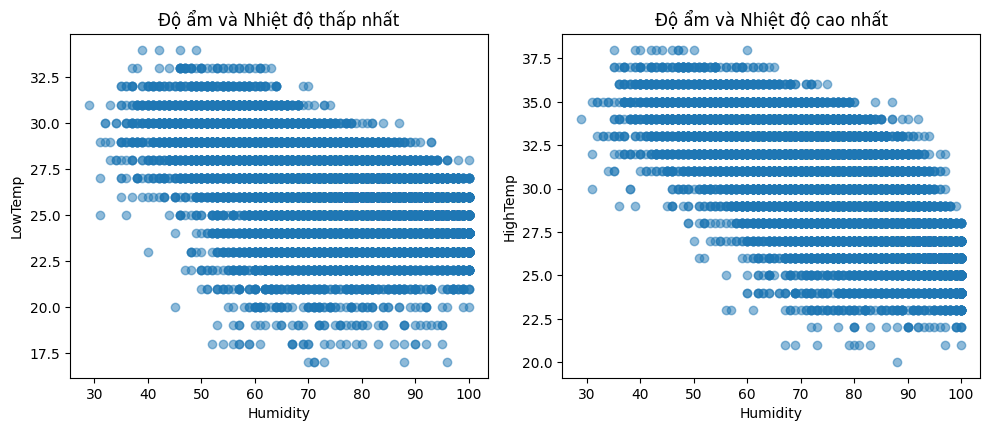

In [127]:
# Tạo lưới 2x2 cho biểu đồ Độ ẩm và các thuộc tính khác
plt.figure(figsize=(10, 8))

# Biểu đồ 1: Độ ẩm và Nhiệt độ thấp nhất
plt.subplot(2, 2, 1)
plt.scatter(EDA_df['Humidity'], EDA_df['LowTemp'], alpha=0.5)
plt.xlabel('Humidity')
plt.ylabel('LowTemp')
plt.title('Độ ẩm và Nhiệt độ thấp nhất')

# Biểu đồ 2: Độ ẩm và Nhiệt độ cao nhất
plt.subplot(2, 2, 2)
plt.scatter(EDA_df['Humidity'], EDA_df['HighTemp'], alpha=0.5)
plt.xlabel('Humidity')
plt.ylabel('HighTemp')
plt.title('Độ ẩm và Nhiệt độ cao nhất')

# Hiển thị biểu đồ lưới 2x2
plt.tight_layout()
plt.show()

###Biểu đồ phân tích các yếu tố về thời tiết của TP. Hồ Chí Minh trong năm 2022.

####Temperature

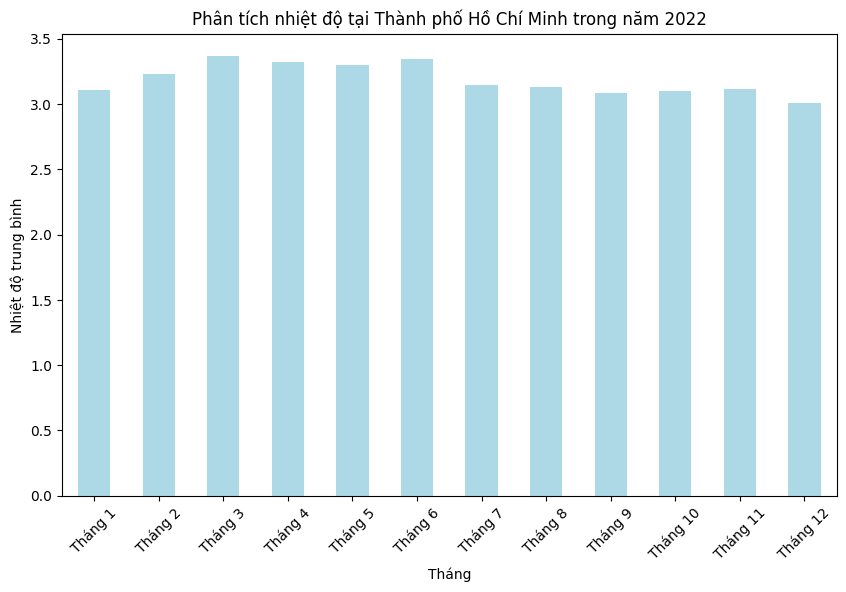

In [128]:
# Lọc dữ liệu cho năm 2022
data_2022 = EDA_df[EDA_df['Date'].dt.year == 2022]

# Tạo biểu đồ phân tích nhiệt độ theo từng tháng
plt.figure(figsize=(10, 6))

# Sử dụng groupby để nhóm dữ liệu theo tháng và tính trung bình nhiệt độ trong mỗi tháng
temperature_by_month = data_2022.groupby(data_2022['Date'].dt.month)['TemperatureEncoded'].mean()

# Đánh giá lại tên của các tháng
month_names = ['Tháng 1', 'Tháng 2', 'Tháng 3', 'Tháng 4', 'Tháng 5', 'Tháng 6', 'Tháng 7', 'Tháng 8', 'Tháng 9', 'Tháng 10', 'Tháng 11', 'Tháng 12']

# Vẽ biểu đồ nhiệt độ trung bình theo từng tháng
temperature_by_month.plot(kind='bar', color='lightblue')
plt.xticks(range(12), month_names, rotation=45)
plt.title('Phân tích nhiệt độ tại Thành phố Hồ Chí Minh trong năm 2022')
plt.xlabel('Tháng')
plt.ylabel('Nhiệt độ trung bình')

# Hiển thị biểu đồ
plt.show()

####Humidity

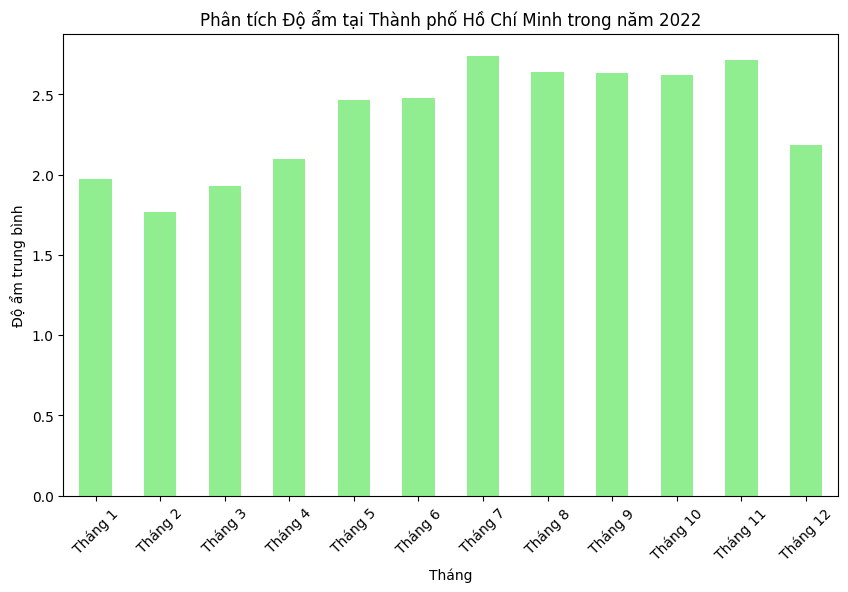

In [129]:
# Tạo biểu đồ phân tích độ ẩm theo từng tháng
plt.figure(figsize=(10, 6))

# Sử dụng groupby để nhóm dữ liệu theo tháng và tính trung bình độ ẩm trong mỗi tháng
humidity_by_month = data_2022.groupby(data_2022['Date'].dt.month)['HumidityEncoded'].mean()

# Đánh giá lại tên của các tháng
month_names = ['Tháng 1', 'Tháng 2', 'Tháng 3', 'Tháng 4', 'Tháng 5', 'Tháng 6', 'Tháng 7', 'Tháng 8', 'Tháng 9', 'Tháng 10', 'Tháng 11', 'Tháng 12']

# Vẽ biểu đồ độ ẩm trung bình theo từng tháng
humidity_by_month.plot(kind='bar', color='lightgreen')
plt.xticks(range(12), month_names, rotation=45)
plt.title('Phân tích Độ ẩm tại Thành phố Hồ Chí Minh trong năm 2022')
plt.xlabel('Tháng')
plt.ylabel('Độ ẩm trung bình')

# Hiển thị biểu đồ
plt.show()

####Barometer

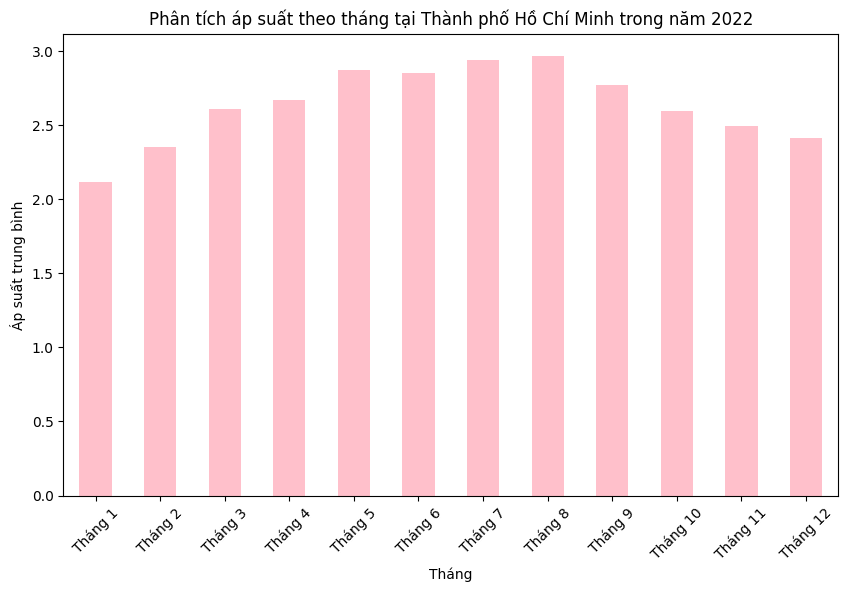

In [130]:
# Tạo biểu đồ phân tích áp suất theo từng tháng
plt.figure(figsize=(10, 6))

# Sử dụng groupby để nhóm dữ liệu theo tháng và tính trung bình áp suất trong mỗi tháng
barometer_by_month = data_2022.groupby(data_2022['Date'].dt.month)['BarometerEncoded'].mean()

# Đánh giá lại tên của các tháng
month_names = ['Tháng 1', 'Tháng 2', 'Tháng 3', 'Tháng 4', 'Tháng 5', 'Tháng 6', 'Tháng 7', 'Tháng 8', 'Tháng 9', 'Tháng 10', 'Tháng 11', 'Tháng 12']

# Vẽ biểu đồ áp suất trung bình theo từng tháng
barometer_by_month.plot(kind='bar', color='pink')
plt.xticks(range(12), month_names, rotation=45)
plt.title('Phân tích áp suất theo tháng tại Thành phố Hồ Chí Minh trong năm 2022')
plt.xlabel('Tháng')
plt.ylabel('Áp suất trung bình')

# Hiển thị biểu đồ
plt.show()

In [131]:
EDA_df

,Date,Time,DayOfWeek,LowTemp,HighTemp,Humidity,Barometer,WindDegrees,WeatherDescription,WindSpeed,AverageTemp,TemperatureEncoded,TemperatureCategory,HumidityLevel,HumidityEncoded,BarometerLevel,BarometerEncoded
4014,2011-01-01,Afternoon,Saturday,27.0,31.0,68.0,1007.0,0.0,Scattered clouds,2.222224,29.0,3,Ấm áp,Khô ráo,2,Áp suất thấp,3
4013,2011-01-01,Morning,Saturday,23.0,29.0,82.0,1009.0,0.0,Scattered clouds,1.111112,26.0,3,Ấm áp,Ẩm ướt,3,Áp suất thấp,3
4015,2011-01-01,Evening,Saturday,23.0,27.0,86.0,1008.0,157.5,Passing clouds,1.944446,25.0,3,Ấm áp,Ẩm ướt,3,Áp suất thấp,3
4012,2011-01-01,Night,Saturday,22.0,23.0,99.0,1007.0,270.0,Fog,0.833334,22.5,2,Mát mẻ,Ẩm ướt,3,Áp suất thấp,3
4019,2011-01-02,Evening,Sunday,23.0,28.0,84.0,1009.0,0.0,Passing clouds,1.666668,25.5,3,Ấm áp,Ẩm ướt,3,Áp suất thấp,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4007,2023-09-29,Evening,Friday,27.0,31.0,89.0,1012.0,0.0,Passing clouds,2.777780,29.0,3,Ấm áp,Ẩm ướt,3,Áp suất bình thường,2
4008,2023-09-30,Night,Saturday,24.0,26.0,98.0,1011.0,247.5,"Light rain, Partly cloudy",2.500002,25.0,3,Ấm áp,Ẩm ướt,3,Áp suất bình thường,2
4009,2023-09-30,Morning,Saturday,24.0,30.0,95.0,1013.0,337.5,Broken clouds,4.166670,27.0,3,Ấm áp,Ẩm ướt,3,Áp suất bình thường,2
4010,2023-09-30,Afternoon,Saturday,28.0,30.0,84.0,1009.0,292.5,Scattered clouds,4.166670,29.0,3,Ấm áp,Ẩm ướt,3,Áp suất thấp,3
